#第四周作业-2   结合归一化和正则化来优化网络模型结构，观察对比loss结果。

In [2]:
from sklearn.datasets import fetch_olivetti_faces
from torchvision.transforms.v2 import ToTensor     # 转换图像数据为张量


In [3]:
olivetti_faces = fetch_olivetti_faces(data_home='./face_data', shuffle=True)
print(olivetti_faces.data.shape)
print(olivetti_faces.target.shape)
print(olivetti_faces.images.shape)


(400, 4096)
(400,)
(400, 64, 64)


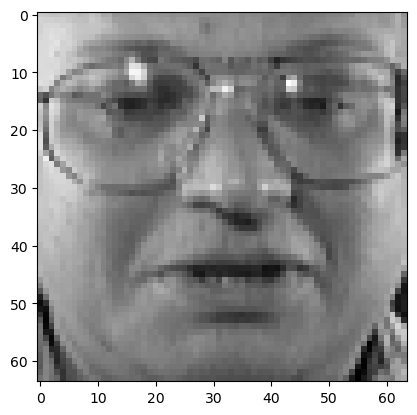

In [4]:
import matplotlib.pyplot as plt

face = olivetti_faces.images[1]
plt.imshow(face, cmap='gray')
plt.show()

In [5]:
import numpy as np
olivetti_faces.data[1]
face_num=set(olivetti_faces.target)
len(face_num)

40

In [110]:
import torch
import torch.nn as nn

In [149]:
images = torch.tensor(olivetti_faces.data)
targets = torch.tensor(olivetti_faces.target,dtype=torch.long)

In [150]:
images = torch.tensor(olivetti_faces.data)
targets = torch.tensor(olivetti_faces.target,dtype=torch.long)

In [151]:
###划分训练数据和测试数据
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, targets, 
                                                     train_size=0.80, 
                                                    random_state=100, shuffle=True, stratify=targets)

X_train.shape

##参数stratify=olivetti_faces.target 表示安装target分层抽样



torch.Size([320, 4096])

In [152]:
# 简单实现
import torch
import torch.nn as nn  # 常用模块
import torch.optim as optim  #优化器

from torch.utils.data import DataLoader  # 数据加载器  


In [153]:
# 定义超参数
LR = 1e-2   ##学习率
epochs = 60      ##训练次数
BATCH_SIZE = 128  ###批次

In [154]:
# 定义模型
model = nn.Sequential(
    nn.Linear(4096, 2048),
    nn.BatchNorm1d(2048),
    nn.ReLU(),
    nn.Linear(2048, 1024),
    nn.ReLU(),
    nn.Linear(1024, 255),
    nn.ReLU(),
            nn.Dropout(p=0.5),

    nn.Linear(255,40)
)

In [155]:
# 损失函数&优化器
loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数
# 优化器（模型参数更新）
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [156]:


dataset = [(img,lbl) for img,lbl in zip(X_train, y_train)]
print(dataset[0])

trian_dl = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)  # shuffle=True表示打乱数据

len(dataset)

(tensor([0.5083, 0.6281, 0.6694,  ..., 0.1116, 0.1198, 0.1240]), tensor(31))


320

In [157]:
model.train()
for epoch in range(epochs):
    # 提取训练数据
    for data, target in trian_dl:
        # 前向运算
        output = model(data.reshape(-1, 4096))
        # 计算损失
        loss = loss_fn(output, target)
        # 反向传播
        optimizer.zero_grad()  # 所有参数梯度清零
        loss.backward()     # 计算梯度（参数.grad）
        optimizer.step()    # 更新参数

    print(f'BatchSize:{BATCH_SIZE} Epoch:{epoch} Loss: {loss.item()}')

BatchSize:128 Epoch:0 Loss: 3.6914889812469482
BatchSize:128 Epoch:1 Loss: 3.666973829269409
BatchSize:128 Epoch:2 Loss: 3.647179365158081
BatchSize:128 Epoch:3 Loss: 3.6333272457122803
BatchSize:128 Epoch:4 Loss: 3.5983266830444336
BatchSize:128 Epoch:5 Loss: 3.5944223403930664
BatchSize:128 Epoch:6 Loss: 3.5360491275787354
BatchSize:128 Epoch:7 Loss: 3.531395435333252
BatchSize:128 Epoch:8 Loss: 3.5401840209960938
BatchSize:128 Epoch:9 Loss: 3.5042097568511963
BatchSize:128 Epoch:10 Loss: 3.4813730716705322
BatchSize:128 Epoch:11 Loss: 3.464637041091919
BatchSize:128 Epoch:12 Loss: 3.432676076889038
BatchSize:128 Epoch:13 Loss: 3.4130585193634033
BatchSize:128 Epoch:14 Loss: 3.4009621143341064
BatchSize:128 Epoch:15 Loss: 3.3442394733428955
BatchSize:128 Epoch:16 Loss: 3.3513541221618652
BatchSize:128 Epoch:17 Loss: 3.2669472694396973
BatchSize:128 Epoch:18 Loss: 3.2643370628356934
BatchSize:128 Epoch:19 Loss: 3.2312123775482178
BatchSize:128 Epoch:20 Loss: 3.23333740234375
BatchSize

In [158]:
dataset_test = [(img,lbl) for img,lbl in zip(X_test, y_test)]
print(dataset_test[0])

len(dataset_test)
 
y_test

(tensor([0.5248, 0.5372, 0.5785,  ..., 0.5289, 0.5083, 0.4380]), tensor(4))


tensor([ 4, 11, 33, 27, 24,  3, 34, 16,  4, 39, 39,  6,  7, 19, 27, 15, 17, 36,
        37, 20, 38, 22,  5, 10,  9, 31, 12, 24, 22,  6, 36, 28, 25, 21,  9, 25,
        17, 12, 19,  5, 14,  8, 28, 23, 34, 37, 13, 38, 23, 20,  0,  3,  7,  1,
        29, 32, 14, 26, 18,  2, 10, 15, 16,  2, 26, 13, 11, 29, 33, 21, 30, 35,
         8, 30,  0, 35, 32,  1, 31, 18])

In [159]:
###测试
# 测试
test_dl = DataLoader(dataset_test, batch_size=BATCH_SIZE)

correct = 0
total = 0
model.eval() ##作用于drop 正则化和归一化失效
with torch.no_grad():  # 不计算梯度
    for data, target in test_dl:
        output = model(data.reshape(-1, 4096))
        _, predicted = torch.max(output, 1)  # 返回每行最大值和索引
        total += target.size(0)  # size(0) 等效 shape[0]
        correct += (predicted == target).sum().item()

print(f'Accuracy: {correct/total*100}%')

print(torch.max(output, 1))
print(f"predicted-->{predicted}")


Accuracy: 78.75%
torch.return_types.max(
values=tensor([1.4908, 2.8740, 4.4309, 3.2130, 0.8869, 0.9157, 1.1496, 2.3716, 1.6703,
        1.0900, 0.9779, 2.7432, 3.6579, 1.6988, 2.6392, 2.1476, 1.4482, 4.2407,
        1.0307, 0.7449, 3.2023, 0.8692, 2.3419, 3.0485, 2.1414, 2.3658, 0.7374,
        0.7903, 1.0764, 2.9982, 4.2562, 2.9796, 2.2754, 4.3611, 2.2996, 1.0448,
        1.2403, 0.6281, 1.4687, 4.0494, 1.4209, 1.6394, 2.7711, 2.3324, 2.1757,
        1.4332, 1.1607, 3.4193, 2.3185, 1.4470, 2.2897, 0.8942, 2.6983, 2.4837,
        1.8439, 3.9876, 0.8986, 2.0875, 2.3060, 0.9947, 3.0577, 1.5892, 1.4537,
        1.1166, 2.1419, 2.1359, 3.2035, 1.4102, 4.5259, 4.2344, 1.8689, 2.4678,
        1.5152, 2.6700, 1.3037, 2.3475, 3.8729, 2.5587, 2.5415, 2.6632]),
indices=tensor([ 5, 11, 33, 27,  9,  7, 38, 16,  5, 39, 11,  6,  7, 21, 27, 15,  7, 36,
        37, 20, 38, 22,  5, 10,  9, 31, 12, 16, 22,  6, 36, 28, 25, 21,  9, 27,
        17,  7, 19,  5, 14,  8, 28, 23, 34, 37, 13, 38, 23, 28,  0,  5